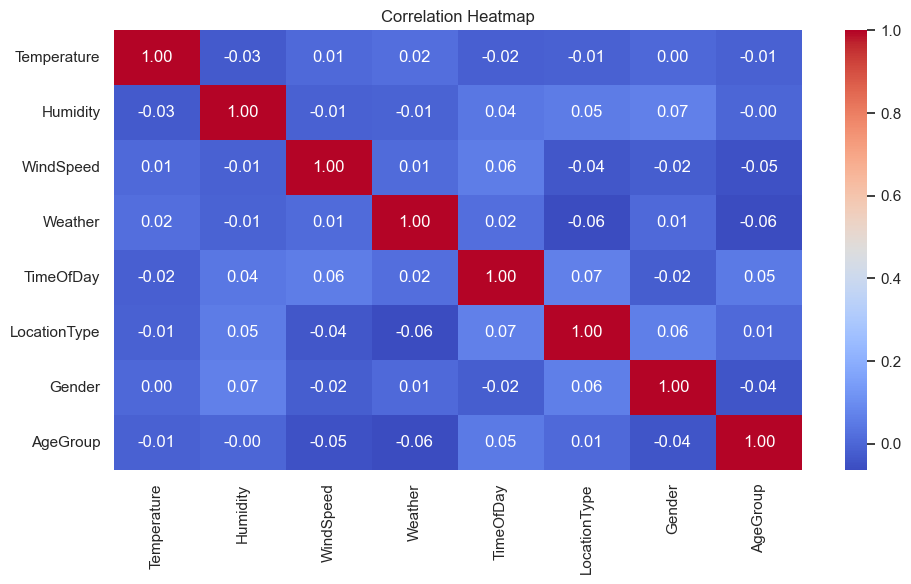

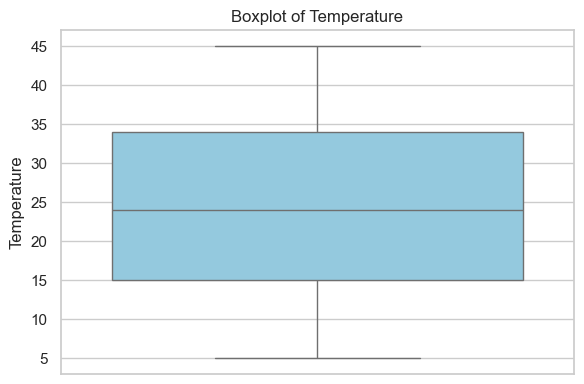

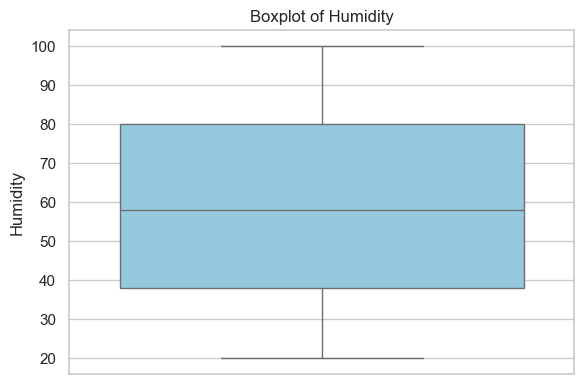

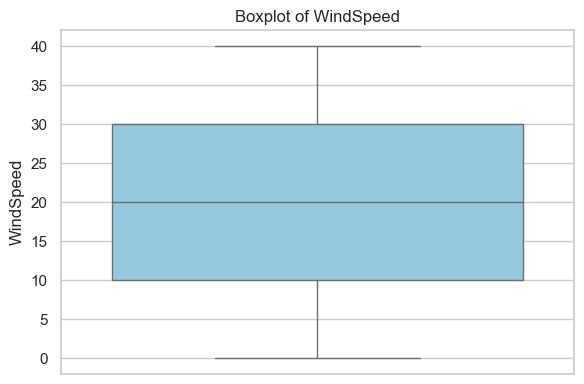

Temperature: 0 potential outliers
Humidity: 0 potential outliers
WindSpeed: 0 potential outliers


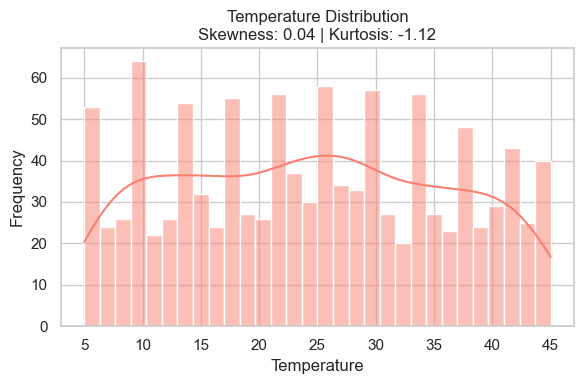

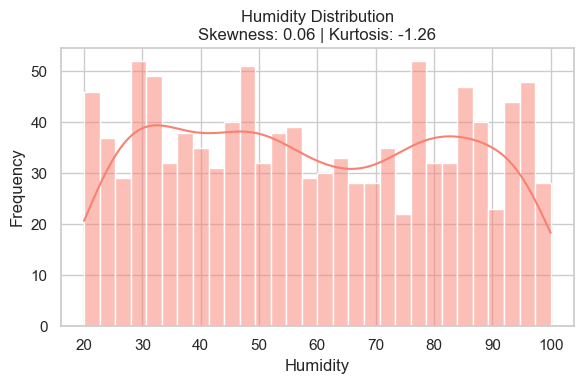

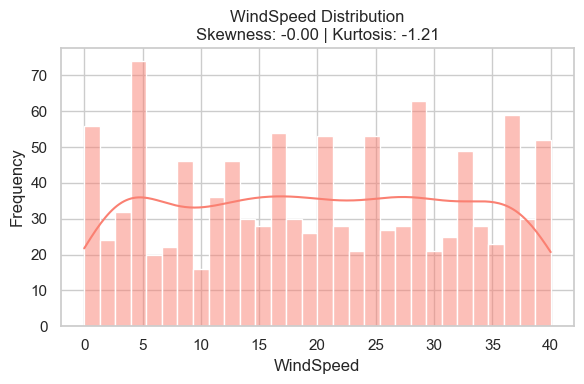

Random Forest Accuracy: 0.8497


['feature_columns.pkl']

In [17]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import joblib

# Load dataset
df = pd.read_csv("weather_outfit_dataset_1100_modified.csv")

# Define feature columns
categorical_cols = ['Weather', 'TimeOfDay', 'LocationType', 'Gender', 'AgeGroup']
numerical_cols = ['Temperature', 'Humidity', 'WindSpeed']

# Encode target variable
label_encoder = LabelEncoder()
df['Outfit'] = label_encoder.fit_transform(df['Outfit'].astype(str))

# Encode categorical features using OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df[categorical_cols] = ordinal_encoder.fit_transform(df[categorical_cols].astype(str))

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# ========== 1. Correlation Heatmap ==========
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols + categorical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# ========== 2. Boxplots for Outlier Detection ==========
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


# IQR method to detect outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} potential outliers")


# ========== 3. Histograms with Skewness and Kurtosis ==========
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='salmon', bins=30)
    plt.title(f'{col} Distribution\nSkewness: {df[col].skew():.2f} | Kurtosis: {df[col].kurtosis():.2f}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


# scatter plot




# Features and Target
X = df[numerical_cols + categorical_cols]
y = df['Outfit']

# Handle class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Train RandomForestClassifier (you said this worked best)
model = RandomForestClassifier(random_state=42)
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Evaluate
y_pred = grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {acc:.4f}")

# Save model and encoders
joblib.dump(grid, 'outfit_predictor.pkl')
joblib.dump(label_encoder, 'outfit_label_encoder.pkl')
joblib.dump(ordinal_encoder, 'outfit_feature_encoder.pkl')
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')


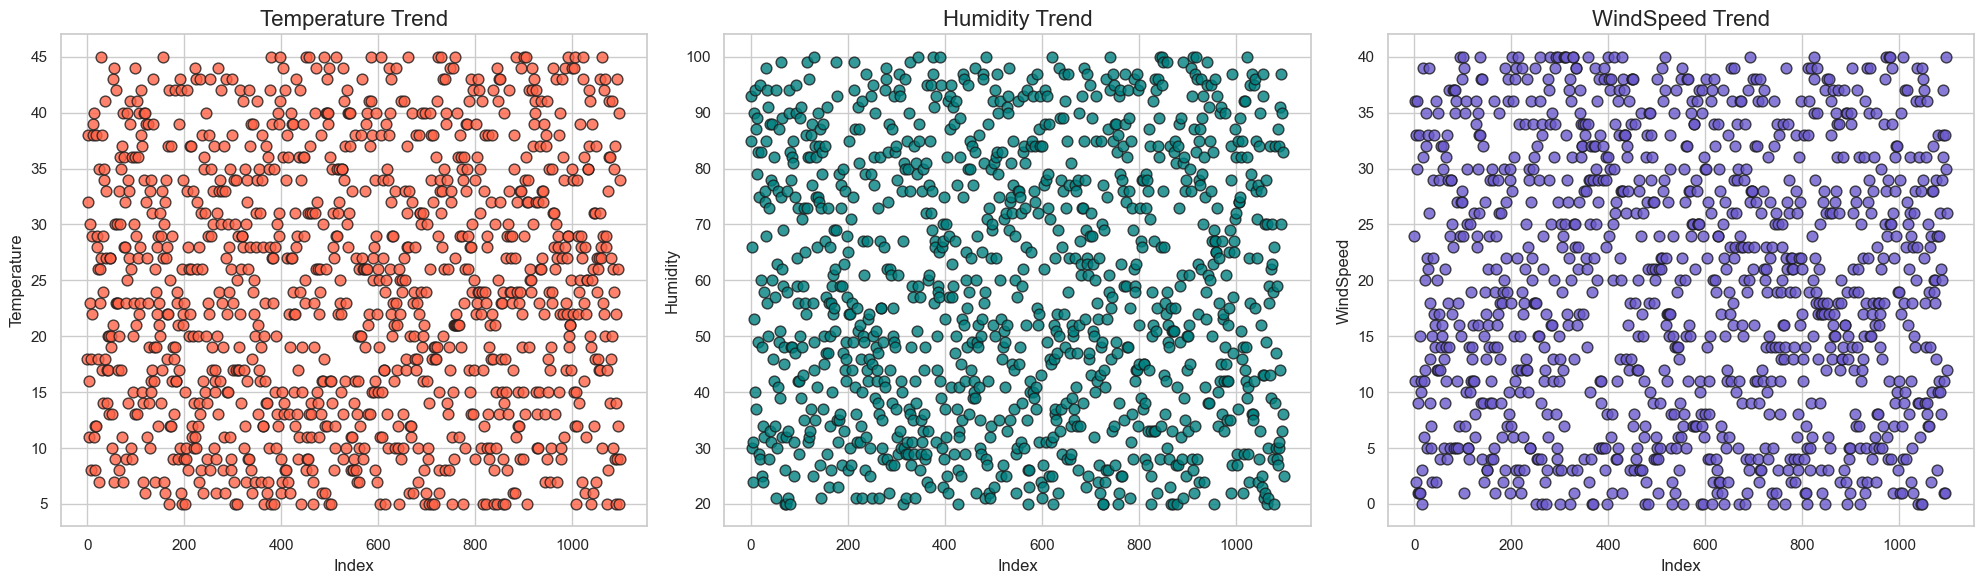

In [21]:
import matplotlib.pyplot as plt

# Bigger figure size and larger markers
plt.figure(figsize=(20, 6))

# Temperature
plt.subplot(1, 3, 1)
plt.scatter(df.index, df['Temperature'], color='tomato', s=60, alpha=0.8, edgecolors='k')
plt.title('Temperature Trend', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Temperature', fontsize=12)

# Humidity
plt.subplot(1, 3, 2)
plt.scatter(df.index, df['Humidity'], color='teal', s=60, alpha=0.8, edgecolors='k')
plt.title('Humidity Trend', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Humidity', fontsize=12)

# WindSpeed
plt.subplot(1, 3, 3)
plt.scatter(df.index, df['WindSpeed'], color='slateblue', s=60, alpha=0.8, edgecolors='k')
plt.title('WindSpeed Trend', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('WindSpeed', fontsize=12)

plt.tight_layout()
plt.show()


In [10]:
X_test

,Temperature,Humidity,WindSpeed,Weather,TimeOfDay,LocationType,Gender,AgeGroup
1392,10,57,2,3.0,0.880776,1.293592,1.000000,1.412816
1649,28,90,28,3.0,0.805425,1.268475,1.000000,0.731525
640,12,78,15,4.0,2.000000,1.000000,0.000000,2.000000
997,25,65,3,0.0,3.000000,1.000000,0.000000,3.000000
402,7,70,24,4.0,2.000000,0.000000,1.000000,3.000000
...,...,...,...,...,...,...,...,...
230,28,21,12,1.0,0.000000,1.000000,0.000000,3.000000
233,13,61,38,2.0,3.000000,1.000000,0.000000,2.000000
1302,28,29,23,3.0,0.862479,1.724958,0.862479,2.587437
725,15,20,14,2.0,3.000000,1.000000,1.000000,1.000000


In [12]:
y_test

1392    2
1649    4
640     3
997     0
402     5
       ..
230     1
233     5
1302    2
725     5
1722    4
Name: Outfit, Length: 346, dtype: int64

In [13]:
pred = stack.predict(X_test.iloc[3, 0:21].values.reshape(1,-1))

NameError: name 'stack' is not defined

In [5]:
pred

array([0])

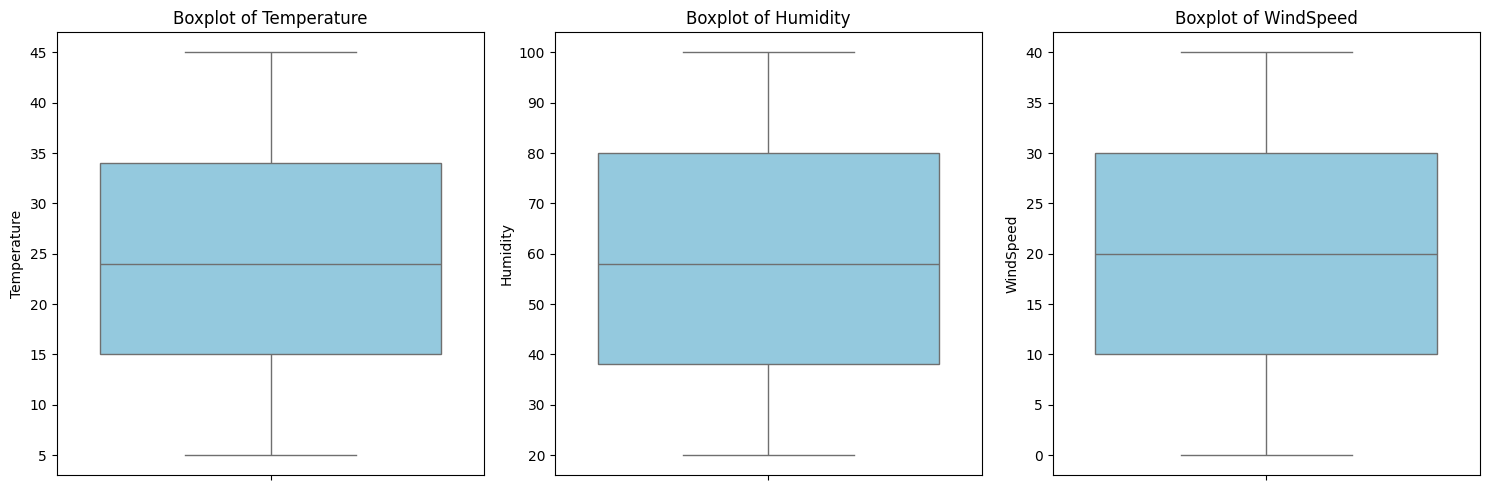

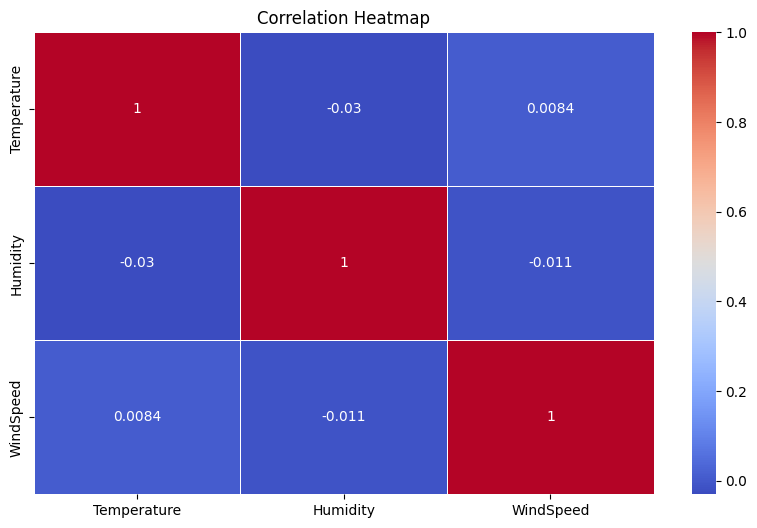

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("weather_outfit_dataset_1100_modified.csv")

# Define numerical columns
numerical_cols = ['Temperature', 'Humidity', 'WindSpeed']

# 1️⃣ BOXPLOTS (Before removing outliers)
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 2️⃣ CORRELATION HEATMAP
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 3️⃣ OUTLIER DETECTION & REMOVAL using IQR
# def remove_outliers_iqr(data, columns):
#     df_clean = data.copy()
#     for col in columns:
#         Q1 = df_clean[col].quantile(0.25)
#         Q3 = df_clean[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
#     return df_clean

# # Apply IQR-based filtering
# df_cleaned = remove_outliers_iqr(df, numerical_cols)

# print(f"Original shape: {df.shape}")
# print(f"Cleaned shape: {df_cleaned.shape}")

# # 4️⃣ BOXPLOTS (After removing outliers)
# plt.figure(figsize=(15, 5))
# for i, col in enumerate(numerical_cols):
#     plt.subplot(1, 3, i+1)
#     sns.boxplot(y=df_cleaned[col], color='lightgreen')
#     plt.title(f'Boxplot of {col} (Cleaned)')
# plt.tight_layout()
# plt.show()


In [3]:
from scipy.stats import zscore

# Compute z-scores
z_scores = np.abs(zscore(df[numerical_cols]))

# Filter rows where all z-scores are < 3 (i.e., not outliers)
df_cleaned_z = df[(z_scores < 3).all(axis=1)]

print(f"Original shape: {df.shape}")
print(f"After Z-score filtering: {df_cleaned_z.shape}")


Original shape: (1100, 9)
After Z-score filtering: (1100, 9)


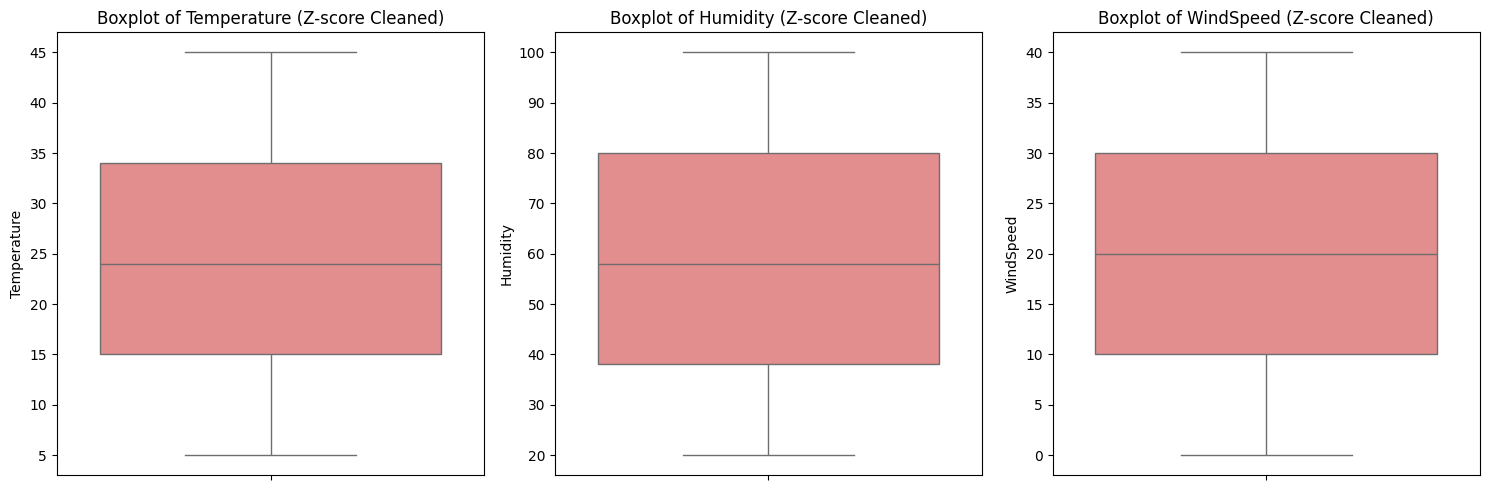

In [4]:
# Boxplots after Z-score based filtering
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df_cleaned_z[col], color='lightcoral')
    plt.title(f'Boxplot of {col} (Z-score Cleaned)')
plt.tight_layout()
plt.show()


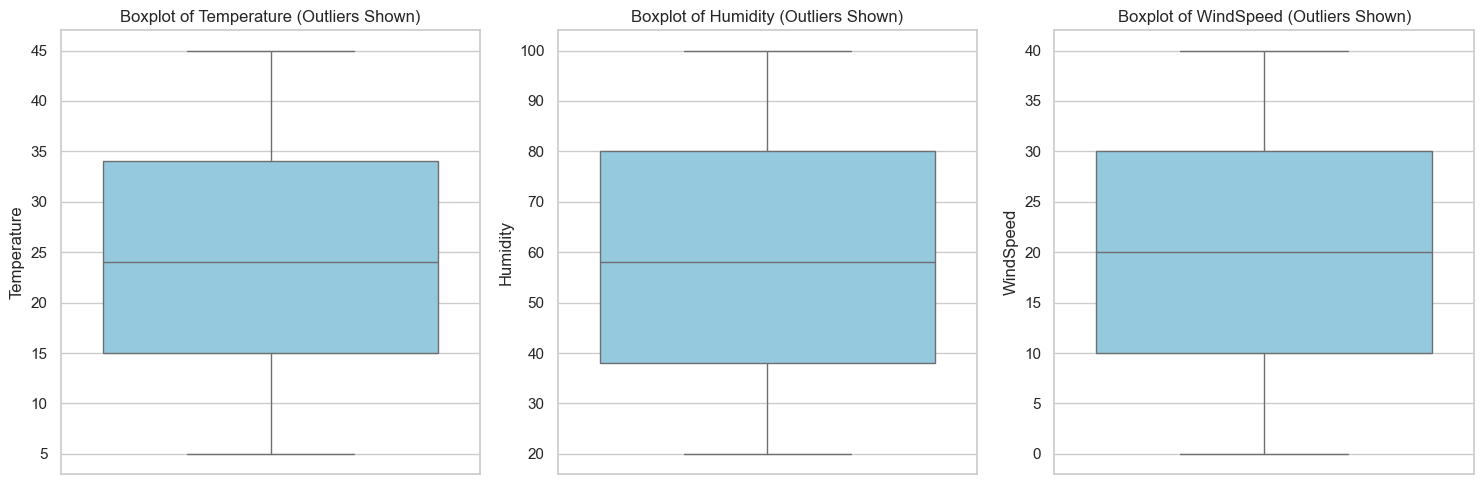

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Create boxplots with outliers explicitly shown
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue', fliersize=5, flierprops=dict(marker='o', color='red', alpha=0.6))
    plt.title(f'Boxplot of {col} (Outliers Shown)')
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Columns to check
numerical_cols = ['Temperature', 'Humidity', 'WindSpeed']

for col in numerical_cols:
    outliers, low, high = detect_outliers_iqr(df, col)
    print(f"\nColumn: {col}")
    print(f"Outliers found: {len(outliers)}")
    print(f"Lower Bound: {low}, Upper Bound: {high}")
    if not outliers.empty:
        print(outliers[[col]])



Column: Temperature
Outliers found: 0
Lower Bound: -13.5, Upper Bound: 62.5

Column: Humidity
Outliers found: 0
Lower Bound: -25.0, Upper Bound: 143.0

Column: WindSpeed
Outliers found: 0
Lower Bound: -20.0, Upper Bound: 60.0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# ========== 1. Correlation Heatmap ==========
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols + categorical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# ========== 2. Boxplots for Outlier Detection ==========
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# ========== 3. Histograms with Skewness and Kurtosis ==========
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='salmon', bins=30)
    plt.title(f'{col} Distribution\nSkewness: {df[col].skew():.2f} | Kurtosis: {df[col].kurtosis():.2f}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


NameError: name 'categorical_cols' is not defined

<Figure size 1000x600 with 0 Axes>